# Historical Analysis of Formula 1 

Being a fan of Formula 1 since I was in middle school, I have always wanted to explore how the sports has changed since its inception. Since Formula 1 is the epitome of automotive engineering coupled with the highest driving quality, I want to explore how these changes get reflected in the data so far. My starting point for this analsysis is a free dataset available from Kaggle that covers the sport from 1950 - 2022. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing datasets

f1_races = pd.read_csv("Data/races.csv")
f1_results = pd.read_csv("Data/results.csv")
f1_drivers = pd.read_csv("Data/drivers.csv")
f1_constructors = pd.read_csv("Data/constructors.csv")

# Merging datasets 
f1_master = pd.merge(f1_races, f1_results, on = 'raceId')
f1_master = pd.merge(f1_master, f1_drivers, on = 'driverId')
f1_master = pd.merge(f1_master, f1_constructors, on = 'constructorId')

In [3]:
# creating dataset for number of wins by driver
f1_dwin = {'year': f1_master['year'],
           'driverID': f1_master['driverId'],
           'driverFirstName': f1_master['forename'],
           'driverLastName': f1_master['surname'],
           'points': f1_master['points']
           }

# converting to dataframe 
df_dwin = pd.DataFrame(f1_dwin)

# Calculate the sum of points grouped by year and driver
df_dwin['total_points'] = df_dwin.groupby(['year', 'driverID'])['points'].transform('sum')

# keeping unique values per year and driver
df_dwin = df_dwin.drop_duplicates(subset=['year', 'driverID', 'total_points'])


## Number of Drivers per Season

Formula 1 has always been an extremely dangerous sports, but 21st century improvements in safety have dramatically reduced fatal accidents that occur in the sport which gets reflected in the turnover rate of drivers per season. This graph shows the number of drivers who raced in at least one Grand Prix in a given year. The number of drivers racing in a season reduced dramtically between 1950 and 1970. 

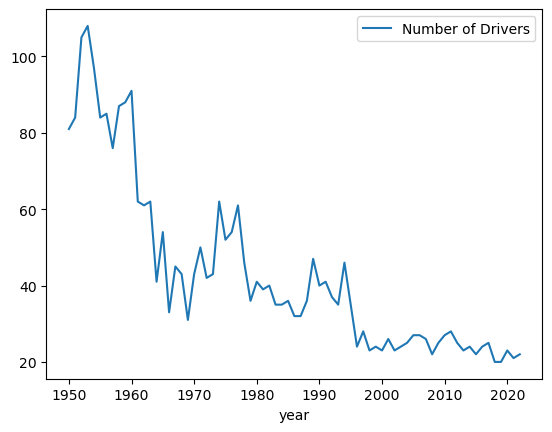

In [4]:
# Count the number of drivers grouped by year
counts = df_dwin.groupby('year').size().reset_index(name='count')

# Create a line plot of counts by year
counts.plot(x='year', y='count', kind='line', label='Number of Drivers')
plt.legend()
plt.show()